# Machine Learning - Linear Regression
Linear Regression is a machine learning method used to find the relationship between two things.

It helps us predict a value based on another value using a straight line.

In [140]:
# Importing Necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn. linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np


In [141]:
# Loading the Dataset
df = pd.read_csv('House Price Prediction Dataset.csv')
df


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119


## 1. Statistical Analysis

In [142]:
# Checking first 5 rows of the Dataset
df.head()


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [143]:
# Checking the last 5 rows of the Dataset
df.tail()


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119
1999,2000,2989,5,1,3,1903,Suburban,Fair,No,482525


In [144]:
# Checking the total number of rows and columns
df.shape


(2000, 10)

In [145]:
# Checking all the important stats
df.describe()


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


## 2. Handling Null Values

In [146]:
# Selecting te columns that we will work on
df = df. drop(columns =['Id', 'Condition'], axis = 1)
df


,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Garage,Price
0,1360,5,4,3,1970,Downtown,No,149919
1,4272,5,4,3,1958,Downtown,No,424998
2,3592,2,2,3,1938,Downtown,No,266746
3,966,4,2,2,1902,Suburban,Yes,244020
4,4926,1,4,2,1975,Downtown,Yes,636056
...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,No,295620
1996,3046,5,2,1,2019,Suburban,Yes,580929
1997,1062,5,1,2,1903,Rural,No,476925
1998,4062,3,1,2,1936,Urban,Yes,161119


In [147]:
# Checking Total Null Values in each Column
df.isnull().sum()

# No null values found

,0
Area,0
Bedrooms,0
Bathrooms,0
Floors,0
YearBuilt,0
Location,0
Garage,0
Price,0


## 3. Data Pre-Processing

#### Step 1. Encoding

In [148]:
# Changing the Categorical Data into Numerical using LabelEncoder
# Only label encode binary column like 'Garage'
le = LabelEncoder()
df['Garage'] = le.fit_transform(df['Garage'])

# One-hot encode nominal categorical column like 'Location'
df = pd.get_dummies(df, columns=['Location'], drop_first=True)


## 4. Selecting Features and Targets

In [149]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Garage,Price,Location_Rural,Location_Suburban,Location_Urban
0,1360,5,4,3,1970,0,149919,False,False,False
1,4272,5,4,3,1958,0,424998,False,False,False
2,3592,2,2,3,1938,0,266746,False,False,False
3,966,4,2,2,1902,1,244020,False,True,False
4,4926,1,4,2,1975,1,636056,False,False,False


In [150]:
# Selecting features as x
x = df.drop(columns= 'Price', axis = 1)
x


,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Garage,Location_Rural,Location_Suburban,Location_Urban
0,1360,5,4,3,1970,0,False,False,False
1,4272,5,4,3,1958,0,False,False,False
2,3592,2,2,3,1938,0,False,False,False
3,966,4,2,2,1902,1,False,True,False
4,4926,1,4,2,1975,1,False,False,False
...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,0,False,True,False
1996,3046,5,2,1,2019,1,False,True,False
1997,1062,5,1,2,1903,0,True,False,False
1998,4062,3,1,2,1936,1,False,False,True


In [151]:
# Selecting y as Target
y = df['Price']
y


,Price
0,149919
1,424998
2,266746
3,244020
4,636056
...,...
1995,295620
1996,580929
1997,476925
1998,161119


## 5. Scaling by StandardScaler


In [152]:
# Using StandardScaler() to balances the values
scaler = StandardScaler()
x = scaler.fit_transform(x)
print(x)


[[-1.10147065  1.40179052  1.30556821 ... -0.55732934 -0.56426196
  -0.5658021 ]
 [ 1.14748543  1.40179052  1.30556821 ... -0.55732934 -0.56426196
  -0.5658021 ]
 [ 0.62231712 -0.70458141 -0.49832569 ... -0.55732934 -0.56426196
  -0.5658021 ]
 ...
 [-1.33161794  1.40179052 -1.40027264 ...  1.79427124 -0.56426196
  -0.5658021 ]
 [ 0.9853011  -0.00245743 -1.40027264 ... -0.55732934 -0.56426196
   1.76740243]
 [ 0.15661639  1.40179052 -1.40027264 ... -0.55732934  1.77222649
  -0.5658021 ]]


## 6. Splitting Data (Train and Test)

In [153]:
# Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Checking the data for training and testing
print(X_train.shape)
print(X_test.shape)


(1600, 9)
(400, 9)


## 7. Training on Linear Regression Model

In [154]:
# Training on linear regression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## 8. Prediction

In [155]:
# Predicting on Linear Regression
y_pred = model.predict(X_test)


## 9. Evaluating the Model

In [156]:
# Evaluation of Model
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

In [157]:
# Printing
print('\t\t\t\t\t --- Evaluation Model ---')
print()

print('Mean Squared Error: ', MSE)
print('Mean Absolute Error: ', MAE)
print('R2 Score: ', R2)
print("RMSE:", RMSE)


					 --- Evaluation Model ---

Mean Squared Error:  78308293814.24956
Mean Absolute Error:  243356.29360509146
R2 Score:  -0.006548495704146395
RMSE: 279836.19103727373


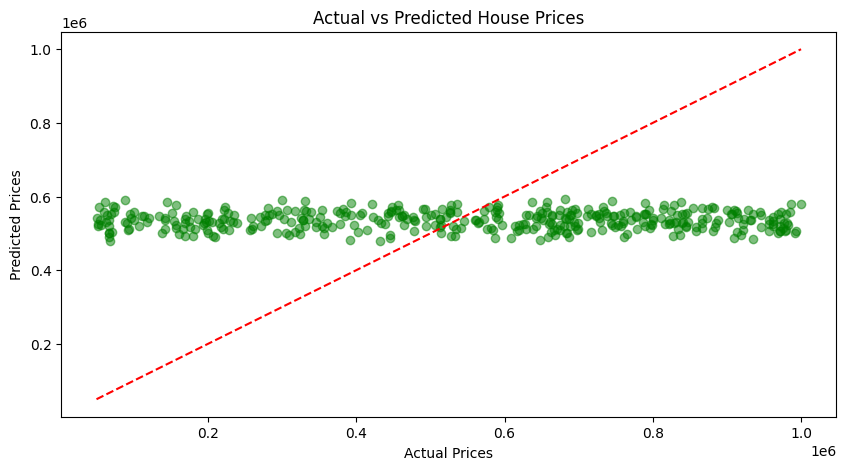

In [158]:
# VISUALIZING USING SCATTER AND LINE PLOT
# Deciding the size
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha = 0.5,  color='green')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.show()
